In [1]:
import sys
sys.path.insert(0, '/home/misa/git_repositories/APDFT/prototyping/apdft-ofdft-cpmd/')

from profess_calculator import PROFESS_CPMD
import profess_io as pio
from cpmd import initialize_atoms
from ase.md.verlet import VelocityVerlet
from ase import units
import os
import numpy as np
from matplotlib import pyplot as plt

from ase import Atoms
from ase.io.trajectory import Trajectory

#import pixiedust

In [13]:
# initialize atoms object from PROFESS files
pos_file = '/home/misa/projects/APDFT-CPMD/data/BOMD/ase_NVE/Si8_hc/ion.restart_file'
vel_file = '/home/misa/projects/APDFT-CPMD/data/BOMD/ase_NVE/Si8_hc/vel.restart_file'
atoms = initialize_atoms(pos_file, vel_file, pos_type='CART')

In [14]:
# set parameters for PROFESS calculation
profess_path = '/home/misa/software/PROFESS-1/PROFESS' # on avl24
#profess_path = '/home/misa/opt/PROFESS-1/PROFESS' # on avl51
log = '/home/misa/projects/APDFT-CPMD/data/CPMD/debug_Si8/Si8_debug.log'
traj_path = '/home/misa/projects/APDFT-CPMD/data/CPMD/debug_Si8/Si8_debug.traj'
run_dir = '/home/misa/projects/APDFT-CPMD/data/CPMD/debug_Si8'
ini_den = '/home/misa/projects/APDFT-CPMD/data/CPMD/debug_Si8/initial_data/ase_nve.den'
ini_ion = '/home/misa/projects/APDFT-CPMD/data/CPMD/debug_Si8/initial_data/ase_nve.ion'
inpt_name = 'Si8_debug'
pp_names = ['si.lda.recpot']

mu = 380
dt = 0.001 # time interval in fs
t = 9.6 # total time in fs
steps = 100#int(t/dt)
# make empty calculator
calc = PROFESS_CPMD()
# pass calculator to atoms object
atoms.calc = calc
# initialize calc object with correct parameters
atoms.calc.initialize(atoms, dt, ini_den, ini_ion, inpt_name, mu, 'CART', pp_names, profess_path, run_dir, debug=False)

In [15]:
#%%pixie_debugger
# remove old logfile
try:
    os.remove(log)
except FileNotFoundError:
    print('Already deleted')

dyn = VelocityVerlet(atoms, dt*units.fs, logfile=log)
traj = Trajectory(traj_path, 'w', dyn.atoms)
dyn.attach(traj.write, interval=1)

dyn.run(steps)
traj.close()

# save kinetic energy of electron density
atoms.calc.DensOpt.save_property('ekin_dens')

In [16]:
len(atoms.calc.DensOpt.ekin_dens)

102

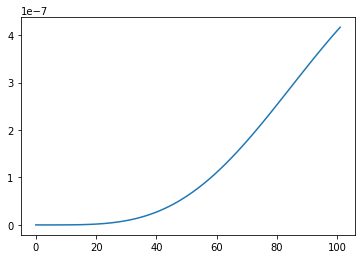

In [17]:
plt.plot(atoms.calc.DensOpt.ekin_dens)

In [ ]:
#plt.plot(atoms.calc.DensOpt.store_dEdX[3])

plt.plot(atoms.calc.DensOpt.store_dEdX[2])
plt.plot(atoms.calc.DensOpt.store_dEdX[0])
plt.plot(atoms.calc.DensOpt.store_dEdX[1])



In [ ]:
atoms.calc.DensOpt.store_dEdX[1]/atoms.calc.DensOpt.V*(36**3)-atoms.calc.DensOpt.store_dEdX[0]/atoms.calc.DensOpt.V*(36**3)

In [18]:
log = np.loadtxt('/home/misa/projects/APDFT-CPMD/data/CPMD/debug_Si8/Si8_debug.log', skiprows=1)
time = log[:,0]*1000# np.linspace(0, 6.2298, 62298)

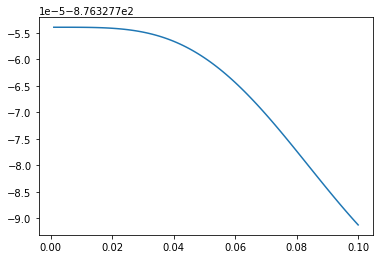

In [19]:
plt.plot(time, log[:,1])

In [20]:
(log[:,1][-1]-log[:,1][0])/8*1000/units.Ha

-0.0001713919815358427

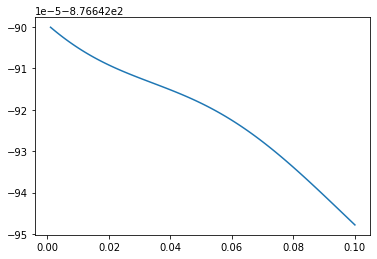

In [21]:
plt.plot(time, log[:,2])

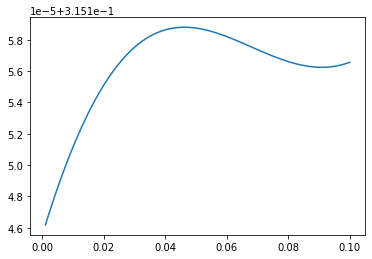

In [22]:
plt.plot(time, log[:,3])

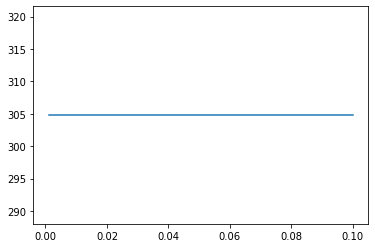

In [23]:
plt.plot(time, log[:,4])

In [ ]:
dyn.atoms.get_positions()